### Loading the data

Pandas handels only structed data. It soes not support unstructured data like image, video etc.

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')

In [3]:
type(df) #Its dataframe object not numpy array

pandas.core.frame.DataFrame

In [5]:
df.head(3)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No


In [6]:
df.tail(3)

,Country,Age,Salary,Purchased
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


### Selecting rows and columns

simailar to numpy array indexing

In [9]:
# Check column names
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [10]:
#We can rename the columns
df.columns = ['country', 'age', 'salary', 'purchased']

In [11]:
df.columns

Index(['country', 'age', 'salary', 'purchased'], dtype='object')

In [12]:
df.head(3)

,country,age,salary,purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No


In [13]:
#To select multiple columns
df[['country', 'age']]

,country,age
0,France,44.0
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0


In [14]:
type(df['country']) #Its a series

pandas.core.series.Series

In [16]:
type(df[['country', 'age']]) # Its a dataframe

pandas.core.frame.DataFrame

For multiple colmns it becomes a dataframe and for single its a series. for a 2D its a dataframe.

Usually in Numpy we select the rows using square bracket but here in pandas we are using this for column selection.

In [18]:
import numpy as np
a = np.array([[11,2,3],[4,5,6]])
a, a[1]

(array([[11,  2,  3],
        [ 4,  5,  6]]),
 array([4, 5, 6]))

In [19]:
#Selecting rows of a dataframe (WIll use loc or iloc)
# Getting 0th row data
df.iloc[0]

country       France
age             44.0
salary       72000.0
purchased         No
Name: 0, dtype: object

In [20]:
df.loc[0]

country       France
age             44.0
salary       72000.0
purchased         No
Name: 0, dtype: object

In [21]:
# iloc is used for integer indices where as loc uses the index labels.

In [24]:
# Loading a dataframe using one of the coulmn as index
df2 = pd.read_csv('data.csv', index_col='age') 
# This one throws error as age column is not unique

ValueError: Index age invalid

In [25]:
# Selecting multiple rows
df[df['age']>30]

,country,age,salary,purchased
0,France,44.0,72000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [35]:
df[(df['age']>30) & (df['purchased']=='Yes')]

,country,age,salary,purchased
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
9,France,37.0,67000.0,Yes


In [31]:
# How to convert a dataframe into a numpy array as most ML models process the arrays
df.values 

array([['France', 44.0, 72000.0, 'No'],
       ['Spain', 27.0, 48000.0, 'Yes'],
       ['Germany', 30.0, 54000.0, 'No'],
       ['Spain', 38.0, 61000.0, 'No'],
       ['Germany', 40.0, nan, 'Yes'],
       ['France', 35.0, 58000.0, 'Yes'],
       ['Spain', nan, 52000.0, 'No'],
       ['France', 48.0, 79000.0, 'Yes'],
       ['Germany', 50.0, 83000.0, 'No'],
       ['France', 37.0, 67000.0, 'Yes']], dtype=object)

In [33]:
# The above type was dtype object because it alos contains the strings
# To selct only numerical array
A = df[['age','salary']].values
A

array([[4.4e+01, 7.2e+04],
       [2.7e+01, 4.8e+04],
       [3.0e+01, 5.4e+04],
       [3.8e+01, 6.1e+04],
       [4.0e+01,     nan],
       [3.5e+01, 5.8e+04],
       [    nan, 5.2e+04],
       [4.8e+01, 7.9e+04],
       [5.0e+01, 8.3e+04],
       [3.7e+01, 6.7e+04]])

In [34]:
type(A)

numpy.ndarray

### apply() function

In [36]:
df.head()

,country,age,salary,purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [39]:
def age_30(row):
    return row[1] + 30

df.apply(age_30, axis=1) #To apply rowwise otherwise dfeault value is 0 whihc is column opn

0    74.0
1    57.0
2    60.0
3    68.0
4    70.0
5    65.0
6     NaN
7    78.0
8    80.0
9    67.0
dtype: float64

In [40]:
df['age+30'] = df.apply(age_30, axis=1)
df.head(5)

,country,age,salary,purchased,age+30
0,France,44.0,72000.0,No,74.0
1,Spain,27.0,48000.0,Yes,57.0
2,Germany,30.0,54000.0,No,60.0
3,Spain,38.0,61000.0,No,68.0
4,Germany,40.0,NaN,Yes,70.0


### Plottings with Pandas

<AxesSubplot:>

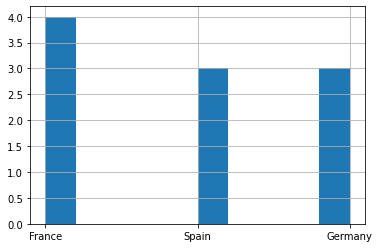

In [41]:
df['country'].hist()

<AxesSubplot:ylabel='country'>

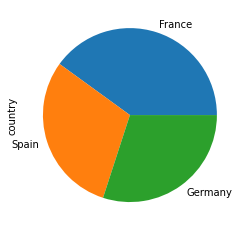

In [46]:
df['country'].value_counts().plot(kind='pie')

<AxesSubplot:>

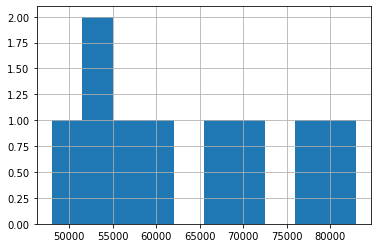

In [55]:
df['salary'].hist()

<AxesSubplot:>

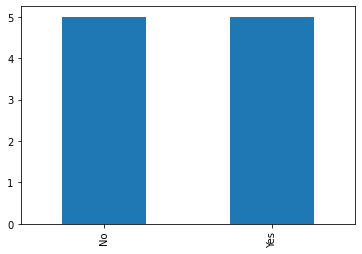

In [53]:
df['purchased'].value_counts().plot.bar()

<AxesSubplot:>

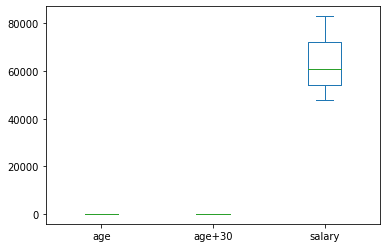

In [54]:
df[['age', 'age+30','salary']].plot.box()

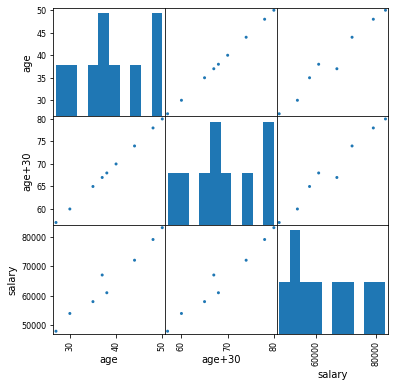

In [61]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df[['age', 'age+30','salary']], alpha=1, figsize=(6,6))

scatter_matrix generates the plots that will shows the colinerity of columns with each othere column. The diagonal histogram shows the distribution of the specifc column and other scatter plot are its stastical relationships with other columns.

### Pandas Exercise

1) Generate dataframe with x1, x2 and y

2) Add columns x1^2, x2^2 and x1*x2

3) Save the dataframe to a csv without header and index

In [69]:
import numpy as np
x1 = np.random.randint(2,9,5) #Generate 5 random values pickedup between 2 and 9
x2 = np.random.randint(8, 15, 5)
y = np.random.randint(0,2,5)

In [81]:
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
df

,x1,x2,y
0,7,9,0
1,2,13,1
2,8,13,1
3,8,11,1
4,5,12,1


In [82]:
df['x1^2'] = df['x1'].apply(lambda x: x*x)
df['x2^2'] = df['x2'].apply(lambda x: x*x)
df

,x1,x2,y,x1^2,x2^2
0,7,9,0,49,81
1,2,13,1,4,169
2,8,13,1,64,169
3,8,11,1,64,121
4,5,12,1,25,144


In [83]:
df['x1*x2'] = df['x1'] * df['x2']
df

,x1,x2,y,x1^2,x2^2,x1*x2
0,7,9,0,49,81,63
1,2,13,1,4,169,26
2,8,13,1,64,169,104
3,8,11,1,64,121,88
4,5,12,1,25,144,60


In [84]:
df = df[['x1', 'x2', 'x1^2', 'x2^2', 'x1*x2', 'y']]
df

,x1,x2,x1^2,x2^2,x1*x2,y
0,7,9,49,81,63,0
1,2,13,4,169,26,1
2,8,13,64,169,104,1
3,8,11,64,121,88,1
4,5,12,25,144,60,1


In [85]:
#To save it to the csv file
df.to_csv('donut_data.csv', header=False, index=False)

In [88]:
# Reading the data
df_load = pd.read_csv('donut_data.csv', header=None)
df_load

,0,1,2,3,4,5
0,7,9,49,81,63,0
1,2,13,4,169,26,1
2,8,13,64,169,104,1
3,8,11,64,121,88,1
4,5,12,25,144,60,1


### SQL operations on Pandas DataFrame

We will use Titanic dataset to practice the Pandas SQL capability

In [96]:
path = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/'
data = pd.read_csv(path + "titanic.csv")
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### SELECT

In [98]:
#SELECT Survived, Pclass, Name FROM data LIMIT 5;
data[['Survived', 'Pclass', 'Name']].head(5)

,Survived,Pclass,Name
0,0,3,Mr. Owen Harris Braund
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...
2,1,3,Miss. Laina Heikkinen
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle
4,0,3,Mr. William Henry Allen


### WHERE

In [99]:
#SELECT * FROM data WHERE Sex = 'male' LIMIT 5

data[data['Sex']=='male'].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


### OR and AND operation

In [101]:
#SELECT * FROM data WHERE Sex = 'Male' AND Age > 5.00;
data[(data['Sex'] == 'male') & (data['Age'] > 5.00)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
12,0,3,Mr. William Henry Saundercock,male,20.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
879,0,2,Mr. Frederick James Banfield,male,28.0,0,0,10.5000
880,0,3,Mr. Henry Jr Sutehall,male,25.0,0,0,7.0500
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


### Group by

We perform the group-by operation to make groups of the data values using some categories.

In [103]:
# SELECT Sex, count(*) FROM data GROUP BY Sex;

data.groupby('Sex').size()

Sex
female    314
male      573
dtype: int64

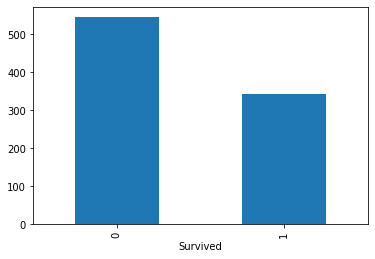

In [108]:
_ = data.groupby('Survived').size().plot(kind='bar')

In [104]:
# same can be get using values_counts
data['Sex'].value_counts()

male      573
female    314
Name: Sex, dtype: int64

### JOIN

#### Innerjoin

This gives only common data (A n B)

In [109]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                     'value': np.random.randn(4)})

df2 = pd.DataFrame({'key': ['B', 'D', 'D', 'E'],
                     'value': np.random.randn(4)})

In [113]:
df1


,key,value
0,A,-0.199612
1,B,0.731732
2,C,-0.055431
3,D,1.727122


In [114]:
df2

,key,value
0,B,0.158857
1,D,0.921006
2,D,-0.209692
3,E,-1.868008


In [115]:
# Select * from df1 inner join df2 on df1.key = df2.key;
pd.merge(df1, df2, on='key') 

,key,value_x,value_y
0,B,0.731732,0.158857
1,D,1.727122,0.921006
2,D,1.727122,-0.209692


In [120]:
#Its same as this
pd.merge(df1, df2, on='key', how='inner')

,key,value_x,value_y
0,B,0.731732,0.158857
1,D,1.727122,0.921006
2,D,1.727122,-0.209692


#### Left Outer Join

This operation helps us join the datasets using a clause. With the help of this, we can preserve the unmatched rows of the left data and join them with a NULL row in the shape of the right table.

In [116]:
# SELECT * FROM df1 LEFT OUTER JOIN df2 ON df1.key = df2.key;

pd.merge(df1, df2, on='key', how='left')

,key,value_x,value_y
0,A,-0.199612,NaN
1,B,0.731732,0.158857
2,C,-0.055431,NaN
3,D,1.727122,0.921006
4,D,1.727122,-0.209692


####  Right Outer Join

In [117]:
# SELECT * FROM df1 RIGHT OUTER JOIN df2 ON df1.key = df2.key;
pd.merge(df1, df2, on='key', how='right')

,key,value_x,value_y
0,B,0.731732,0.158857
1,D,1.727122,0.921006
2,D,1.727122,-0.209692
3,E,NaN,-1.868008


#### FULL or FULL OUTER JOIN

This operation preserves all the rows of every data while joining them.

In [118]:
# SELECT * FROM df1 FULL OUTER JOIN df2 ON df1.key = df2.key;
pd.merge(df1, df2, on='key', how='outer')

,key,value_x,value_y
0,A,-0.199612,NaN
1,B,0.731732,0.158857
2,C,-0.055431,NaN
3,D,1.727122,0.921006
4,D,1.727122,-0.209692
5,E,NaN,-1.868008


#### For reference please look below article

https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/